In [1]:
%pip install aps-toolkit --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from aps_toolkit import Auth
import pandas as pd

In [2]:
token = Auth().auth2leg()

In [3]:
urn = "urn:adsk.wipprod:dm.lineage:j2R5fwxfTJq9DOsvX1p9ZQ"

In [15]:
from aps_toolkit import PropDbReaderRevit
prop_reader = PropDbReaderRevit(urn, token)

In [16]:
df =prop_reader.get_all_data()
df.head()

,dbId,external_id,ElementId,Name,Category,CategoryId,Image,Keynote,Export to IFC,Export to IFC As,...,Filter,Sorting/Grouping,Formatting,Appearance,Embedded Schedule,ScheduleType_ARC,Swatch Width,Swatch Height,Values Displayed,Font
0,254,e3e052f9-0156-11d5-9301-0000863f27ad-00000017,23,Default,Revit Materials,-2000700.0,,,By Type,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255,e3e052f9-0156-11d5-9301-0000863f27ad-00000018,24,Default Wall,Revit Materials,-2000700.0,,,By Type,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,256,e3e052f9-0156-11d5-9301-0000863f27ad-00000019,25,Default Roof,Revit Materials,-2000700.0,,,By Type,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,257,e3e052f9-0156-11d5-9301-0000863f27ad-0000001a,26,Glass,Revit Materials,-2000700.0,,,By Type,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258,e3e052f9-0156-11d5-9301-0000863f27ad-0000001d,29,Phase - Temporary,Revit Materials,-2000700.0,,,By Type,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dir = "./output"
import os
if not os.path.exists(dir):
    os.makedirs(dir)
file_path = os.path.join(dir, "Model.parquet")
df.astype(str).to_parquet(file_path, index=False)

In [18]:
# read parquet file
df = pd.read_parquet(file_path)
df.head()

,dbId,external_id,ElementId,Name,Category,CategoryId,Image,Keynote,Export to IFC,Export to IFC As,...,Filter,Sorting/Grouping,Formatting,Appearance,Embedded Schedule,ScheduleType_ARC,Swatch Width,Swatch Height,Values Displayed,Font
0,254,e3e052f9-0156-11d5-9301-0000863f27ad-00000017,23,Default,Revit Materials,-2000700.0,,,By Type,,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,255,e3e052f9-0156-11d5-9301-0000863f27ad-00000018,24,Default Wall,Revit Materials,-2000700.0,,,By Type,,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,256,e3e052f9-0156-11d5-9301-0000863f27ad-00000019,25,Default Roof,Revit Materials,-2000700.0,,,By Type,,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,257,e3e052f9-0156-11d5-9301-0000863f27ad-0000001a,26,Glass,Revit Materials,-2000700.0,,,By Type,,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,258,e3e052f9-0156-11d5-9301-0000863f27ad-0000001d,29,Phase - Temporary,Revit Materials,-2000700.0,,,By Type,,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [42]:
# clear data null
df = df.dropna()

## Review Categories

In [19]:
# get all categories by df.Category
df.Category.unique()


array(['Revit Materials', 'Revit Primary Contours', 'Revit Area Schemes',
       'Revit Phases', 'Revit Shared Site', 'Revit Work Plane Grid',
       'Revit Project Information', 'Revit Structural Load Cases',
       'Revit Sun Path', 'Revit Internal Origin',
       'Revit Color Fill Schema', 'Revit HVAC Zones',
       'Revit HVAC Load Schedules', 'Revit Building Type Settings',
       'Revit Space Type Settings', 'Revit Survey Point',
       'Revit Project Base Point',
       'Revit Electrical Demand Factor Definitions',
       'Revit Electrical Load Classifications',
       'Revit Panel Schedule Templates - Branch Panel',
       'Revit Panel Schedule Templates - Data Panel',
       'Revit Panel Schedule Templates - Switchboard',
       'Revit Electrical Load Classification Parameter Element',
       'Revit Pipe Segments', 'Revit Material Assets',
       'Revit Legend Components', 'Revit Views', 'Revit Text Notes',
       'Revit Lines', 'Revit Detail Items', 'Revit <Sketch>',
       '

## Review Elements 

In [43]:
# how many elements
df.ElementId.count()

18355

In [44]:
df.ElementId.value_counts()

ElementId
23         1
6362799    1
6362821    1
6362820    1
6362819    1
          ..
6367336    1
5929880    1
6060120    1
6060128    1
6386022    1
Name: count, Length: 18355, dtype: int64

In [45]:
# see how many ElementId group by Category
df_category_group = df.groupby('Category').ElementId.count()
# sort by value count 
df_category_group = df_category_group.sort_values(ascending=False)
df_category_group

Category
Revit <Sketch>                                  4043
Revit Lines                                     3603
Revit Automatic Sketch Dimensions               2215
Revit Room Tags                                  696
Revit Rooms                                      691
                                                ... 
Revit HVAC Zones                                   1
Revit Panel Schedule Templates - Switchboard       1
Revit Project Base Point                           1
Revit Project Information                          1
Revit Panel Schedule Templates - Data Panel        1
Name: ElementId, Length: 86, dtype: int64

In [46]:
# remove all df_category_group have values <=1
df_category_group = df_category_group[df_category_group > 100]
df_category_group

Category
Revit <Sketch>                             4043
Revit Lines                                3603
Revit Automatic Sketch Dimensions          2215
Revit Room Tags                             696
Revit Rooms                                 691
Revit Text Notes                            594
Revit Railing Rail Path Extension Lines     537
Revit Materials                             518
Revit Reference Planes                      491
Revit Legend Components                     429
Revit Detail Items                          413
Revit <Room Separation>                     345
Revit Walls                                 289
Revit <Area Boundary>                       275
Revit <Stair/Ramp Sketch: Boundary>         274
Revit Dimensions                            203
Revit Balusters                             194
Revit Spot Elevations                       182
Revit Sun Path                              172
Revit Doors                                 145
Revit Ceilings                 

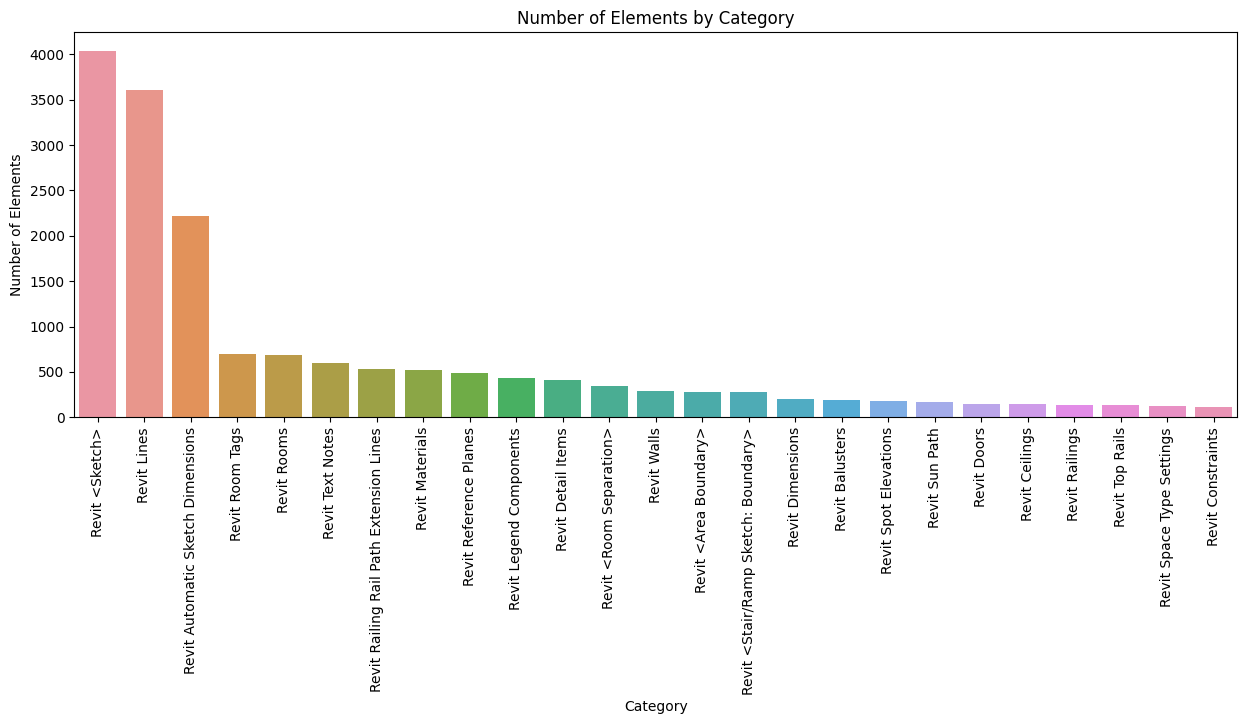

In [38]:
# Visualize the result
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.barplot(x=df_category_group.index, y=df_category_group.values)
plt.xticks(rotation=90)
plt.title('Number of Elements by Category')
plt.xlabel('Category')
plt.ylabel('Number of Elements')
plt.show()

Issues with model
- 2D sketech

In [47]:
# see all Category have < and < inside string 
df[df.Category.str.contains('<')].Category.unique()

array(['Revit <Sketch>', 'Revit <Area Boundary>',
       'Revit <Stair/Ramp Sketch: Boundary>', 'Revit <Room Separation>',
       'Revit <Stair/Ramp Sketch: Stair Path>'], dtype=object)